In [42]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import kagglehub

from sklearn.model_selection import train_test_split

In [43]:
# Select Random seeds for reproductibility
torch.manual_seed(42)

In [44]:
path = kagglehub.dataset_download("yashpalthakor/fmnist-small-csv", path="fmnist_small.csv")
df = pd.read_csv(path)
df.head()

Using Colab cache for faster access to the 'fmnist-small-csv' dataset.


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


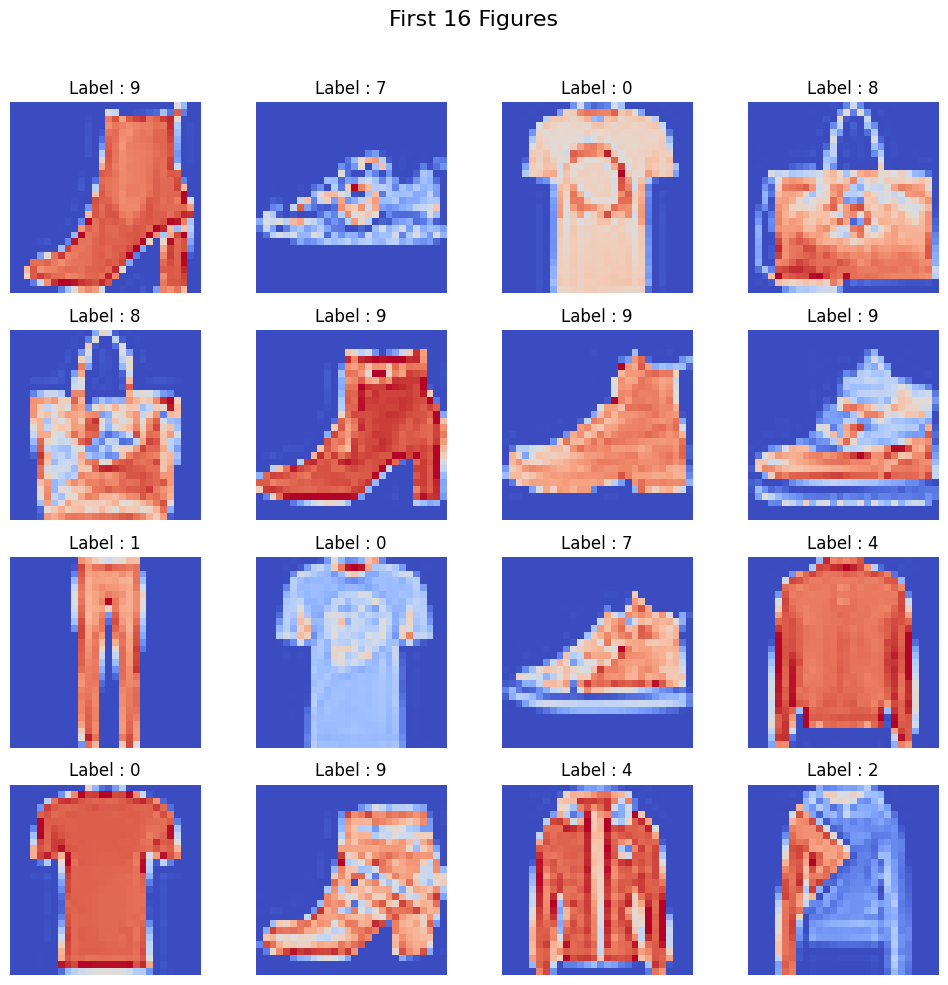

In [45]:
# Create 4 x 4 Grid of Images
fig, axes = plt.subplots(4, 4, figsize = (10, 10))
fig.suptitle('First 16 Figures',  fontsize = 16)

# Plot The first 16 Images from Dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1 :].values.reshape(28, 28)               # Reshape to 28 x 28
  ax.imshow(img, cmap = 'coolwarm')                              # Display in greyscale
  ax.axis('off')                                             # Remove axis for cleaner look
  ax.set_title(f'Label : {df.iloc[i, 0]}')                   # Show the label

plt.tight_layout(rect = [0, 0, 1, 0.96])                     # Adjust layout to fit title
plt.show()

In [46]:
# Train Test Split
X = df.iloc[:, 1 :].values
y = df.iloc[:, 0].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [48]:
# Scaling the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [49]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [51]:
# Create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

# Create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [52]:
# Create Train and Test Loader
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [53]:
from torch.nn.modules.linear import Linear
# Define NN class
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

      return self.model(x)

In [54]:
# Set Learning Rate and Epochs

learning_rate = 0.1
epochs = 100

In [55]:
# Instantiate the model
model = MyNN(X_train.shape[1])

# Loss_function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [56]:
# Training Loop

for epoch in range(epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    # Forward pass
    out = model(batch_features)

    # Calculate loss
    loss = criterion(out, batch_labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update grad
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()
  average_loss = total_epoch_loss / len(train_loader)
  print(f'Epoch : {epoch + 1}, Loss : {average_loss: .4f}')

Epoch : 1, Loss :  1.3368
Epoch : 2, Loss :  0.7751
Epoch : 3, Loss :  0.6537
Epoch : 4, Loss :  0.5744
Epoch : 5, Loss :  0.5308
Epoch : 6, Loss :  0.4830
Epoch : 7, Loss :  0.4648
Epoch : 8, Loss :  0.4413
Epoch : 9, Loss :  0.4204
Epoch : 10, Loss :  0.3941
Epoch : 11, Loss :  0.3777
Epoch : 12, Loss :  0.3665
Epoch : 13, Loss :  0.3583
Epoch : 14, Loss :  0.3425
Epoch : 15, Loss :  0.3358
Epoch : 16, Loss :  0.3195
Epoch : 17, Loss :  0.3047
Epoch : 18, Loss :  0.3054
Epoch : 19, Loss :  0.2825
Epoch : 20, Loss :  0.2812
Epoch : 21, Loss :  0.2632
Epoch : 22, Loss :  0.2600
Epoch : 23, Loss :  0.2384
Epoch : 24, Loss :  0.2312
Epoch : 25, Loss :  0.2244
Epoch : 26, Loss :  0.2346
Epoch : 27, Loss :  0.2130
Epoch : 28, Loss :  0.2180
Epoch : 29, Loss :  0.2132
Epoch : 30, Loss :  0.1988
Epoch : 31, Loss :  0.1934
Epoch : 32, Loss :  0.1907
Epoch : 33, Loss :  0.1723
Epoch : 34, Loss :  0.1690
Epoch : 35, Loss :  0.1658
Epoch : 36, Loss :  0.1716
Epoch : 37, Loss :  0.1547
Epoch : 38

In [57]:
# Set Model to Eval
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [58]:
# Evaluation code

total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    out = model(batch_features)

    _, predicted = torch.max(out, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()
  print(np.round((correct / total), 4))

0.8533
